In [1]:
import pandas as pd
from dateutil import parser,rrule
from datetime import datetime,time,date
import time as tm
import calendar

In [2]:
# Station list with cities for data loading.
"""stations = [
    ("IAMSTERD55", "Amsterdam"),
    ("IBCNORTH17", "Vancouver"),
    ("IBELFAST4", "Belfast"),
    ("IBERLINB54", "Berlin"),
    ("ICOGALWA4", "Galway"),
    ("ICOMUNID56", "Madrid"),
    ("IDUBLIND35", "Dublin"),
    ("ILAZIORO71", "Rome"),
    ("ILEDEFRA6", "Paris"),
    ("ILONDONL28", "London"),
    ("IMUNSTER11", "Cork"),
    ("INEWSOUT455", "Sydney"),
    ("ISOPAULO61", "Sao Paulo"),
    ("IWESTERN99", "Cape Town"),
    ("KCASANFR148", "San Francisco"),
    ("KNYBROOK40", "New York"),
    #("IRUTHERG2", "Glasgow"),
    ("IRENFREW4", "Glasgow"),
    ("IENGLAND64", "Liverpool"),
    ('IEDINBUR6', 'Edinburgh')
]
"""
# Thanks to Shane Lynn

station = ('IEDINBUR6', 'Edinburgh')
df = pd.read_csv(r'C:\Users\ASUS\Desktop\2016-03+weather_station_hourly_data\{}_weather.csv'.format(station[0]))

In [3]:
df.head()

,Unnamed: 0,Time,TemperatureC,DewpointC,PressurehPa,WindDirection,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,Conditions,Clouds,dailyrainMM,SolarRadiationWatts/m^2,SoftwareType,DateUTC,station
0,0,2015-01-01 00:00:00,10.3,4.5,1001.9,SW,236,9.0,11.9,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:00:00,IEDINBUR6
1,1,2015-01-01 00:06:00,10.2,4.4,1001.9,SW,226,6.9,7.9,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:06:00,IEDINBUR6
2,2,2015-01-01 00:11:00,10.2,4.4,1001.9,SSW,202,7.2,15.8,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:11:00,IEDINBUR6
3,3,2015-01-01 00:16:00,10.2,4.4,1001.9,SSW,202,7.9,11.9,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:16:00,IEDINBUR6
4,4,2015-01-01 00:21:00,10.2,4.6,1002.3,South,174,4.3,7.9,68,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:21:00,IEDINBUR6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101443 entries, 0 to 101442
Data columns (total 18 columns):
Unnamed: 0                 101443 non-null int64
Time                       101443 non-null object
TemperatureC               101443 non-null float64
DewpointC                  101443 non-null float64
PressurehPa                101443 non-null float64
WindDirection              101443 non-null object
WindDirectionDegrees       101443 non-null int64
WindSpeedKMH               101443 non-null float64
WindSpeedGustKMH           101443 non-null float64
Humidity                   101443 non-null int64
HourlyPrecipMM             101443 non-null float64
Conditions                 0 non-null float64
Clouds                     0 non-null float64
dailyrainMM                101443 non-null float64
SolarRadiationWatts/m^2    101442 non-null float64
SoftwareType               101443 non-null object
DateUTC                    101443 non-null object
station                    101443 non-null

In [70]:
#Giving names to columns
df['temp']=df['TemperatureC'].astype(float)
df['rain']=df['HourlyPrecipMM'].astype(float)
df['total_rain']=df['dailyrainMM'].astype(float)
df['date']=df['DateUTC'].apply(parser.parse)
df['humidity']=df['Humidity'].astype(float)
df['wind_direction']=df['WindDirectionDegrees']
df['wind']=df['WindSpeedKMH']
#print(df.info()) dateutc object ilk basta. parser.parse dan sonra datetime64 oldu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101443 entries, 0 to 101442
Data columns (total 25 columns):
Unnamed: 0                 101443 non-null int64
Time                       101443 non-null object
TemperatureC               101443 non-null float64
DewpointC                  101443 non-null float64
PressurehPa                101443 non-null float64
WindDirection              101443 non-null object
WindDirectionDegrees       101443 non-null int64
WindSpeedKMH               101443 non-null float64
WindSpeedGustKMH           101443 non-null float64
Humidity                   101443 non-null int64
HourlyPrecipMM             101443 non-null float64
Conditions                 0 non-null float64
Clouds                     0 non-null float64
dailyrainMM                101443 non-null float64
SolarRadiationWatts/m^2    101442 non-null float64
SoftwareType               101443 non-null object
DateUTC                    101443 non-null object
station                    101443 non-null

In [6]:
#Extracting the data we need
df_needed = df.loc[:,['date','station','temp','rain','total_rain','humidity','wind']]
df_needed = df_needed[(df_needed['date']>=datetime(2015,1,1))&(df_needed['date']<=datetime(2015,12,31))]

In [7]:
df_needed.head()

,date,station,temp,rain,total_rain,humidity,wind
0,2015-01-01 00:00:00,IEDINBUR6,10.3,0.0,0.0,67.0,9.0
1,2015-01-01 00:06:00,IEDINBUR6,10.2,0.0,0.0,67.0,6.9
2,2015-01-01 00:11:00,IEDINBUR6,10.2,0.0,0.0,67.0,7.2
3,2015-01-01 00:16:00,IEDINBUR6,10.2,0.0,0.0,67.0,7.9
4,2015-01-01 00:21:00,IEDINBUR6,10.2,0.0,0.0,68.0,4.3


In [8]:
if(df_needed['rain']<-500).sum()>10:
    print('10 Dan fazla boklanmis data var')

In [9]:
#removing bad samples
#df_needed = df_needed['rain']>-500

In [10]:
type(df_needed)

pandas.core.frame.DataFrame

In [11]:
df_needed=df_needed[df_needed['rain']>-500]

In [12]:
df_needed['day'] = df_needed['date'].apply(lambda x: x.date())

In [13]:
df_needed['time_of_day']= df_needed['date'].apply(lambda x: x.time())
df_needed['day_of_week']=df_needed['date'].apply(lambda x: x.weekday())
df_needed['hour_of_day']=df_needed['time_of_day'].apply(lambda x: x.hour)
df_needed['month']=df_needed['date'].apply(lambda x: x.month)

In [14]:
df_needed['working_day']=(df_needed['day_of_week']>=0) & (df_needed['day_of_week']<=4)
df_needed['morning']=(df_needed['time_of_day']>=time(8,15)) & (df_needed['time_of_day']<=time(9,0))
df_needed['evening']=(df_needed['time_of_day']>=time(17,15)) & (df_needed['time_of_day']<=time(18,0))
df_needed.tail(100)

,date,station,temp,rain,total_rain,humidity,wind,day,time_of_day,day_of_week,hour_of_day,month,working_day,morning,evening
101069,2015-12-30 15:11:00,IEDINBUR6,10.6,0.0,3.0,67.0,15.4,2015-12-30,15:11:00,2,15,12,True,False,False
101070,2015-12-30 15:16:00,IEDINBUR6,10.6,0.0,3.0,67.0,21.6,2015-12-30,15:16:00,2,15,12,True,False,False
101071,2015-12-30 15:21:00,IEDINBUR6,10.6,0.0,3.0,68.0,5.5,2015-12-30,15:21:00,2,15,12,True,False,False
101072,2015-12-30 15:26:00,IEDINBUR6,10.6,0.0,3.0,69.0,8.2,2015-12-30,15:26:00,2,15,12,True,False,False
101073,2015-12-30 15:31:00,IEDINBUR6,10.6,0.0,3.0,68.0,11.6,2015-12-30,15:31:00,2,15,12,True,False,False
101074,2015-12-30 15:36:00,IEDINBUR6,10.5,0.0,3.0,68.0,11.9,2015-12-30,15:36:00,2,15,12,True,False,False
101075,2015-12-30 15:42:00,IEDINBUR6,10.5,0.0,3.0,69.0,12.2,2015-12-30,15:42:00,2,15,12,True,False,False
101076,2015-12-30 15:47:00,IEDINBUR6,10.5,0.0,3.0,70.0,23.3,2015-12-30,15:47:00,2,15,12,True,False,False
101077,2015-12-30 15:52:00,IEDINBUR6,10.5,0.0,3.0,69.0,23.0,2015-12-30,15:52:00,2,15,12,True,False,False
101078,2015-12-30 15:57:00,IEDINBUR6,10.4,0.0,3.0,69.0,20.6,2015-12-30,15:57:00,2,15,12,True,False,False


In [15]:
df_needed['raining'] = df_needed['rain'] > 0


In [16]:
df_needed['get_wet_cycling'] = ((df_needed['morning'] & df_needed['raining']) | (df_needed['evening'] & df_needed['raining'])) & (df_needed['working_day'])

In [17]:
df_needed[df_needed['get_wet_cycling']]['get_wet_cycling'].count()

133

In [18]:
df_clean = df_needed

In [63]:
df_clean.head(30)


,date,station,temp,rain,total_rain,humidity,wind,day,time_of_day,day_of_week,hour_of_day,month,working_day,morning,evening,raining,get_wet_cycling
0,2015-01-01 00:00:00,IEDINBUR6,10.3,0.0,0.0,67.0,9.0,2015-01-01,00:00:00,3,0,1,True,False,False,False,False
1,2015-01-01 00:06:00,IEDINBUR6,10.2,0.0,0.0,67.0,6.9,2015-01-01,00:06:00,3,0,1,True,False,False,False,False
2,2015-01-01 00:11:00,IEDINBUR6,10.2,0.0,0.0,67.0,7.2,2015-01-01,00:11:00,3,0,1,True,False,False,False,False
3,2015-01-01 00:16:00,IEDINBUR6,10.2,0.0,0.0,67.0,7.9,2015-01-01,00:16:00,3,0,1,True,False,False,False,False
4,2015-01-01 00:21:00,IEDINBUR6,10.2,0.0,0.0,68.0,4.3,2015-01-01,00:21:00,3,0,1,True,False,False,False,False
5,2015-01-01 00:26:00,IEDINBUR6,10.2,0.0,0.0,68.0,11.6,2015-01-01,00:26:00,3,0,1,True,False,False,False,False
6,2015-01-01 00:31:00,IEDINBUR6,10.1,0.0,0.0,69.0,11.9,2015-01-01,00:31:00,3,0,1,True,False,False,False,False
7,2015-01-01 00:36:00,IEDINBUR6,10.1,0.0,0.0,69.0,10.5,2015-01-01,00:36:00,3,0,1,True,False,False,False,False
8,2015-01-01 00:41:00,IEDINBUR6,10.1,0.0,0.0,70.0,15.4,2015-01-01,00:41:00,3,0,1,True,False,False,False,False
9,2015-01-01 00:47:00,IEDINBUR6,10.1,0.0,0.0,70.0,11.6,2015-01-01,00:47:00,3,0,1,True,False,False,False,False


In [20]:
#df_clean['israinzero'] = df_clean['rain'] == 0.0
#dfavatime = df_clean[df_clean['israinzero'] == True].groupby('hour_of_day').count()

In [74]:
#dfavatime
df_clean.set_index('date')

,station,temp,rain,total_rain,humidity,wind,day,time_of_day,day_of_week,hour_of_day,month,working_day,morning,evening,raining,get_wet_cycling
date,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,IEDINBUR6,10.3,0.0,0.0,67.0,9.0,2015-01-01,00:00:00,3,0,1,True,False,False,False,False
2015-01-01 00:06:00,IEDINBUR6,10.2,0.0,0.0,67.0,6.9,2015-01-01,00:06:00,3,0,1,True,False,False,False,False
2015-01-01 00:11:00,IEDINBUR6,10.2,0.0,0.0,67.0,7.2,2015-01-01,00:11:00,3,0,1,True,False,False,False,False
2015-01-01 00:16:00,IEDINBUR6,10.2,0.0,0.0,67.0,7.9,2015-01-01,00:16:00,3,0,1,True,False,False,False,False
2015-01-01 00:21:00,IEDINBUR6,10.2,0.0,0.0,68.0,4.3,2015-01-01,00:21:00,3,0,1,True,False,False,False,False
2015-01-01 00:26:00,IEDINBUR6,10.2,0.0,0.0,68.0,11.6,2015-01-01,00:26:00,3,0,1,True,False,False,False,False
2015-01-01 00:31:00,IEDINBUR6,10.1,0.0,0.0,69.0,11.9,2015-01-01,00:31:00,3,0,1,True,False,False,False,False
2015-01-01 00:36:00,IEDINBUR6,10.1,0.0,0.0,69.0,10.5,2015-01-01,00:36:00,3,0,1,True,False,False,False,False
2015-01-01 00:41:00,IEDINBUR6,10.1,0.0,0.0,70.0,15.4,2015-01-01,00:41:00,3,0,1,True,False,False,False,False


In [80]:
print(df_clean.index.name)

None


In [59]:
wet_cycling = df_clean[df_clean['working_day']==True].groupby('day')['get_wet_cycling'].any()
print(wet_cycling.head(20))
wet_cycling = pd.DataFrame(wet_cycling).reset_index()
#print(wet_cycling.head())
wet_cycling['month'] = wet_cycling['day'].apply(lambda x : x.month)
#print(wet_cycling.head())
#print(wet_cycling.info())
monthly = pd.DataFrame(wet_cycling.groupby('month')['get_wet_cycling'].value_counts())
#hata yi gidermek icin once columns name i degistiriyorsun yoksa drop=True kullanman gerek reset_index e oda columnlari siliyor
monthly.columns = ['Days']
#simdi reset_index yapabilirsin
monthly.reset_index(inplace=True)
#print(monthly.head())
monthly.rename(columns={"get_wet_cycling":"Rainy"}, inplace=True)
#print(monthly.head())
monthly.replace({'Rainy':{True:'Wet',False:'Dry'}},inplace=True)
monthly['month_name']=monthly['month'].apply(lambda x: calendar.month_abbr[x])
monthly

day
2015-01-01     True
2015-01-02    False
2015-01-05    False
2015-01-06     True
2015-01-07     True
2015-01-08    False
2015-01-09     True
2015-01-12     True
2015-01-13    False
2015-01-14    False
2015-01-15    False
2015-01-16    False
2015-01-19    False
2015-01-20    False
2015-01-21    False
2015-01-22    False
2015-01-23     True
2015-01-26    False
2015-01-27    False
2015-01-28    False
Name: get_wet_cycling, dtype: bool


,month,Rainy,Days,month_name
0,1,Dry,16,Jan
1,1,Wet,6,Jan
2,2,Dry,19,Feb
3,2,Wet,1,Feb
4,3,Dry,18,Mar
5,3,Wet,4,Mar
6,4,Dry,21,Apr
7,4,Wet,1,Apr
8,5,Dry,16,May
9,5,Wet,5,May


In [23]:
rainy_days = df_needed.groupby(['day']).agg({
        "rain": {"rain": lambda x: (x > 0.0).any(),
                 "rain_amount": "sum"},
        "total_rain": {"total_rain": "max"},
        "get_wet_cycling": {"get_wet_cycling": "any"}
        })

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [24]:
print(rainy_days.head())

rainy_days.head()

             rain             total_rain get_wet_cycling
             rain rain_amount total_rain get_wet_cycling
day                                                     
2015-01-01   True        52.2        4.6            True
2015-01-02   True        52.0        4.8           False
2015-01-03  False         0.0        0.0           False
2015-01-04  False         0.0        0.0           False
2015-01-05  False         0.0        0.0           False


rain             total_rain get_wet_cycling
             rain rain_amount total_rain get_wet_cycling
day                                                     
2015-01-01   True        52.2        4.6            True
2015-01-02   True        52.0        4.8           False
2015-01-03  False         0.0        0.0           False
2015-01-04  False         0.0        0.0           False
2015-01-05  False         0.0        0.0           False

In [25]:
#rainy_days.reset_index(drop=False, inplace=True)
rainy_days.columns


MultiIndex(levels=[['rain', 'total_rain', 'get_wet_cycling'], ['get_wet_cycling', 'rain', 'rain_amount', 'total_rain']],
           codes=[[0, 0, 1, 2], [1, 2, 3, 0]])

In [26]:
rainy_days.reset_index(inplace=True)

In [27]:
rainy_days.head()

day   rain             total_rain get_wet_cycling
                rain rain_amount total_rain get_wet_cycling
0  2015-01-01   True        52.2        4.6            True
1  2015-01-02   True        52.0        4.8           False
2  2015-01-03  False         0.0        0.0           False
3  2015-01-04  False         0.0        0.0           False
4  2015-01-05  False         0.0        0.0           False

In [28]:
rainy_days.index

RangeIndex(start=0, stop=364, step=1)

In [29]:
rainy_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
(day, )                               364 non-null object
(rain, rain)                          364 non-null bool
(rain, rain_amount)                   364 non-null float64
(total_rain, total_rain)              364 non-null float64
(get_wet_cycling, get_wet_cycling)    364 non-null bool
dtypes: bool(2), float64(2), object(1)
memory usage: 9.3+ KB


In [30]:
rainy_days.rename(columns={"":"date"}, inplace=True)

In [31]:
rainy_days.head()

day   rain             total_rain get_wet_cycling
         date   rain rain_amount total_rain get_wet_cycling
0  2015-01-01   True        52.2        4.6            True
1  2015-01-02   True        52.0        4.8           False
2  2015-01-03  False         0.0        0.0           False
3  2015-01-04  False         0.0        0.0           False
4  2015-01-05  False         0.0        0.0           False

In [32]:
rainy_days.columns

MultiIndex(levels=[['day', 'get_wet_cycling', 'rain', 'total_rain'], ['date', 'get_wet_cycling', 'rain', 'rain_amount', 'total_rain']],
           codes=[[0, 2, 2, 3, 1], [0, 2, 3, 4, 1]])

In [33]:
rainy_days.columns = rainy_days.columns.droplevel(level=0)

In [34]:
rainy_days['rain'] = rainy_days['rain'].astype(bool)
rainy_days['date'] = rainy_days['date'].apply(lambda x: pd.to_datetime(x))
print(rainy_days.info())
rainy_days.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
date               364 non-null datetime64[ns]
rain               364 non-null bool
rain_amount        364 non-null float64
total_rain         364 non-null float64
get_wet_cycling    364 non-null bool
dtypes: bool(2), datetime64[ns](1), float64(2)
memory usage: 9.3 KB
None


,date,rain,rain_amount,total_rain,get_wet_cycling
0,2015-01-01,True,52.2,4.6,True
1,2015-01-02,True,52.0,4.8,False
2,2015-01-03,False,0.0,0.0,False
3,2015-01-04,False,0.0,0.0,False
4,2015-01-05,False,0.0,0.0,False


In [35]:
temp = df_needed.groupby(['day','hour_of_day'])['raining'].any()

In [36]:
temp.head(48)


day         hour_of_day
2015-01-01  0              False
            1              False
            2              False
            3              False
            4              False
            5              False
            6              False
            7              False
            8               True
            9               True
            10              True
            11             False
            12              True
            13              True
            14              True
            15              True
            16             False
            17             False
            18             False
            19              True
            20              True
            21             False
            22              True
            23             False
2015-01-02  0              False
            1               True
            2              False
            3              False
            4              False
            5      

In [37]:
print(type(temp))
temp = temp.groupby(level=[0]).sum().reset_index() # burda level 0 tempdeki day columnunu ifade ediyor level 1 olsaydi oda hour_of_day temsil eder cunku bunlar multiindex
print(temp)
print(type(temp))

<class 'pandas.core.series.Series'>
            day  raining
0    2015-01-01     10.0
1    2015-01-02      8.0
2    2015-01-03      0.0
3    2015-01-04      0.0
4    2015-01-05      0.0
5    2015-01-06      4.0
6    2015-01-07      5.0
7    2015-01-08      6.0
8    2015-01-09      4.0
9    2015-01-10      9.0
10   2015-01-11      7.0
11   2015-01-12      7.0
12   2015-01-13      3.0
13   2015-01-14      2.0
14   2015-01-15      2.0
15   2015-01-16      0.0
16   2015-01-17      0.0
17   2015-01-18      1.0
18   2015-01-19      0.0
19   2015-01-20      0.0
20   2015-01-21      0.0
21   2015-01-22      1.0
22   2015-01-23      3.0
23   2015-01-24      0.0
24   2015-01-25      2.0
25   2015-01-26      0.0
26   2015-01-27      0.0
27   2015-01-28      5.0
28   2015-01-29      1.0
29   2015-01-30      0.0
..          ...      ...
334  2015-12-01      8.0
335  2015-12-02      3.0
336  2015-12-03      8.0
337  2015-12-04      7.0
338  2015-12-05     14.0
339  2015-12-06      6.0
340  2015-12-0

In [38]:
temp.columns

Index(['day', 'raining'], dtype='object')

In [39]:
temp.rename(columns={'raining': 'hours_raining'}, inplace=True)
temp.head()
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
day              364 non-null object
hours_raining    364 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [40]:
temp['day'] = temp['day'].apply(lambda x: pd.to_datetime(x))
temp.head()


,day,hours_raining
0,2015-01-01,10.0
1,2015-01-02,8.0
2,2015-01-03,0.0
3,2015-01-04,0.0
4,2015-01-05,0.0


In [41]:
rainy_days = rainy_days.merge(temp, left_on='date', right_on='day', how='left')

In [42]:
rainy_days.head()

,date,rain,rain_amount,total_rain,get_wet_cycling,day,hours_raining
0,2015-01-01,True,52.2,4.6,True,2015-01-01,10.0
1,2015-01-02,True,52.0,4.8,False,2015-01-02,8.0
2,2015-01-03,False,0.0,0.0,False,2015-01-03,0.0
3,2015-01-04,False,0.0,0.0,False,2015-01-04,0.0
4,2015-01-05,False,0.0,0.0,False,2015-01-05,0.0


In [43]:
rainy_days.drop('day', axis=1, inplace=True)

In [44]:
rainy_days.head()

,date,rain,rain_amount,total_rain,get_wet_cycling,hours_raining
0,2015-01-01,True,52.2,4.6,True,10.0
1,2015-01-02,True,52.0,4.8,False,8.0
2,2015-01-03,False,0.0,0.0,False,0.0
3,2015-01-04,False,0.0,0.0,False,0.0
4,2015-01-05,False,0.0,0.0,False,0.0


In [45]:
print("In the year, there were {} rainy days of {} at {}".format(rainy_days['rain'].sum(), len(rainy_days), station))

In the year, there were 194 rainy days of 364 at ('IEDINBUR6', 'Edinburgh')


In [46]:
print("It was wet while cycling {} working days of {} at {}".format(wet_cycling['get_wet_cycling'].sum(),len(wet_cycling),station))
                                                     

It was wet while cycling 44 working days of 260 at ('IEDINBUR6', 'Edinburgh')


In [47]:
print("You get wet cycling {} % of the time!!".format(wet_cycling['get_wet_cycling'].sum()*1.0*100/len(wet_cycling)))

You get wet cycling 16.923076923076923 % of the time!!


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Wet or Dry Commuting in Edinburgh')

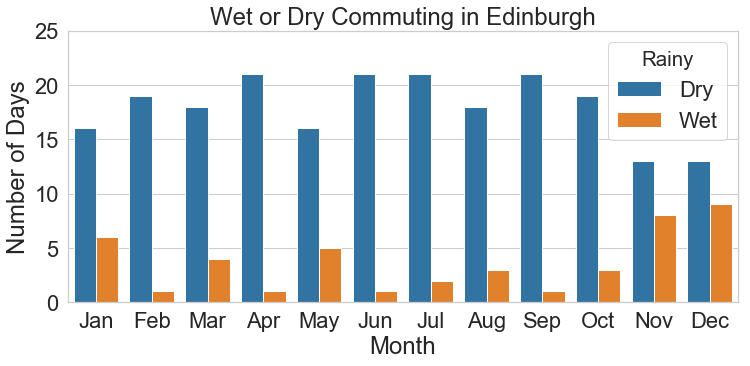

In [49]:
plt.figure(figsize = (12,5))
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale = 2)
sns.barplot(x='month_name',y = 'Days' , hue='Rainy' , data = monthly.sort_values(['month','Rainy']))
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.ylim(0,25)
plt.xlim(-0.5,11.5) # bunu koymasanda olur limiti ayarlamak icin baktik
plt.title("Wet or Dry Commuting in {}".format(station[1]))

In [50]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [51]:
import calmap

In [52]:
temp.set_index('day',inplace=True)

Text(0.5, 1.0, 'Hours Raining')

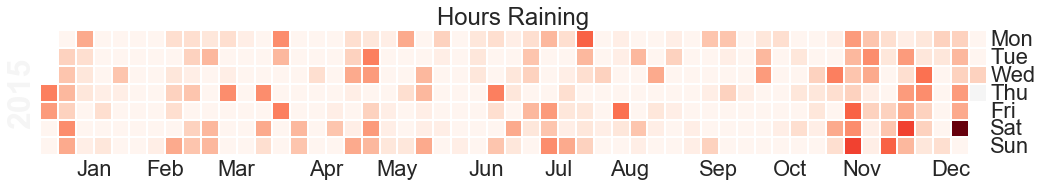

In [53]:
fig,ax = calmap.calendarplot(temp['hours_raining'],fig_kws={"figsize":(15,4)}) # it generates heatmaps
plt.title("Hours Raining")

Text(0.5, 1.0, 'Total Rainfall Daily')

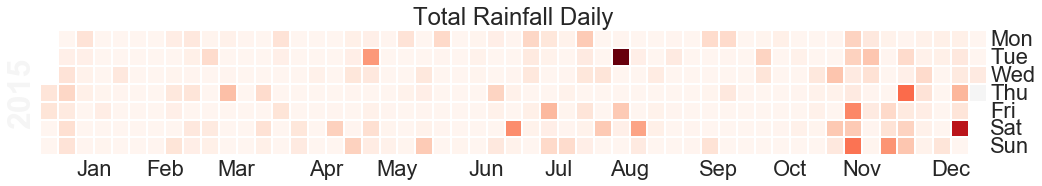

In [54]:
rainy_days.set_index('date',inplace=True)
fig, ax = calmap.calendarplot(rainy_days['total_rain'], fig_kws={"figsize":(15,4)})
plt.title("Total Rainfall Daily")

In [55]:
rainy_days.head()

,rain,rain_amount,total_rain,get_wet_cycling,hours_raining
date,,,,,
2015-01-01,True,52.2,4.6,True,10.0
2015-01-02,True,52.0,4.8,False,8.0
2015-01-03,False,0.0,0.0,False,0.0
2015-01-04,False,0.0,0.0,False,0.0
2015-01-05,False,0.0,0.0,False,0.0


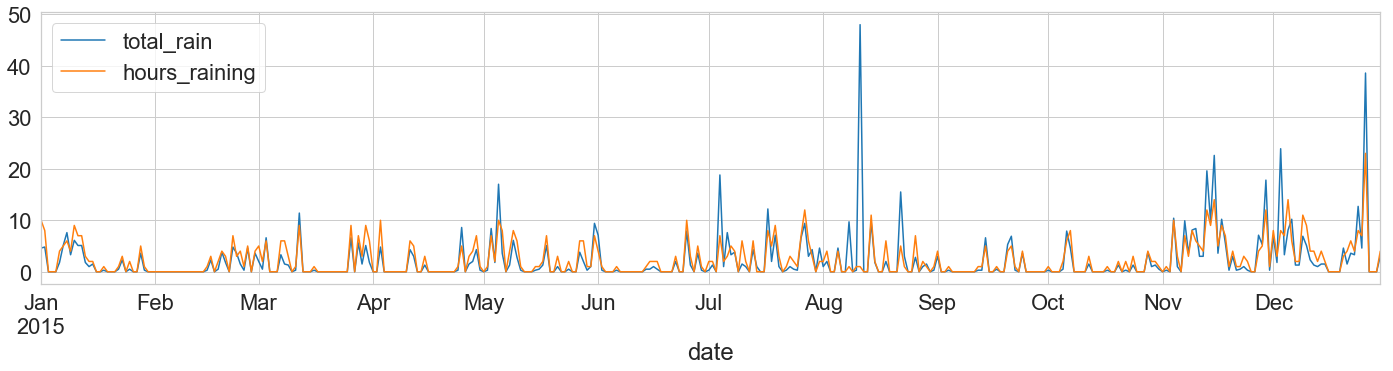

In [56]:
rainy_days[['get_wet_cycling','total_rain','hours_raining']].plot(figsize = (24,5))

In [57]:
rainy_days.head()

,rain,rain_amount,total_rain,get_wet_cycling,hours_raining
date,,,,,
2015-01-01,True,52.2,4.6,True,10.0
2015-01-02,True,52.0,4.8,False,8.0
2015-01-03,False,0.0,0.0,False,0.0
2015-01-04,False,0.0,0.0,False,0.0
2015-01-05,False,0.0,0.0,False,0.0
